In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Set plotting style for better visuals
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# Load the Parquet file
parquet_file = "ais_data_20240911.parquet"
df = pd.read_parquet(parquet_file)

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Display basic information about the DataFrame
print("\nDataFrame Info:")
df.info()

# Display the number of rows and columns
print(f"\nShape of the DataFrame: {df.shape}")

First 5 rows of the dataset:


,mmsi,vessel_name,time,lat,lon,heading,rot,sog,cog,nas,mi,imo,call_sign
0,538011058,AGIA CHARIS,2024-09-11 00:00:01,-24.129660,-46.271113,98.0,0.0,0.0,170.9,0,0,<NA>,V7A6515
1,710003185,SVITZER JOAQUIM R.,2024-09-11 00:00:01,-23.874703,-46.373788,511.0,-128.0,0.0,196.9,8,0,<NA>,PU3490
2,538010074,OINOUSSIAN COURAGE,2024-09-11 00:00:01,-23.988802,-46.292782,37.0,0.0,5.6,45.7,0,0,<NA>,V7A5555
3,636018551,TRANSMERIDIAN,2024-09-11 00:00:01,-23.953395,-46.307160,333.0,5.0,7.5,330.0,0,0,<NA>,D5QF5
4,710028580,WS SCORPIUS,2024-09-11 00:00:01,-23.968200,-46.290470,511.0,-128.0,0.0,173.1,0,0,<NA>,PO2303



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321697 entries, 0 to 321696
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   mmsi         321697 non-null  int64         
 1   vessel_name  321697 non-null  string        
 2   time         321697 non-null  datetime64[ns]
 3   lat          321610 non-null  float64       
 4   lon          321614 non-null  float64       
 5   heading      317031 non-null  float64       
 6   rot          303757 non-null  float64       
 7   sog          317031 non-null  float64       
 8   cog          317031 non-null  float64       
 9   nas          321697 non-null  string        
 10  mi           303757 non-null  Int64         
 11  imo          0 non-null       string        
 12  call_sign    321697 non-null  string        
dtypes: Int64(1), datetime64[ns](1), float64(6), int64(1), string(4)
memory usage: 32.2 MB

Shape of the DataFrame: (32169

In [3]:
# Display column names and their data types
print("Column names and data types:")
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

# Check for missing columns
expected_columns = ["mmsi", "vessel_name", "time", "lat", "lon", "heading", "rot", "sog", "cog", "nas", "mi", "imo", "call_sign"]
missing_columns = [col for col in expected_columns if col not in df.columns]
if missing_columns:
    print(f"\nMissing columns: {missing_columns}")
else:
    print("\nAll expected columns are present.")

Column names and data types:
mmsi: int64
vessel_name: string
time: datetime64[ns]
lat: float64
lon: float64
heading: float64
rot: float64
sog: float64
cog: float64
nas: string
mi: Int64
imo: string
call_sign: string

All expected columns are present.


In [4]:
# Summary statistics for numerical columns
print("Summary statistics for numerical columns:")
display(df.describe())

# Summary for categorical columns
print("\nSummary for categorical columns:")
display(df[["vessel_name", "nas", "call_sign"]].describe())

# Check for missing values
print("\nMissing values in each column:")
display(df.isnull().sum())

Summary statistics for numerical columns:


,mmsi,time,lat,lon,heading,rot,sog,cog,mi
count,3.216970e+05,321697,321610.000000,321614.000000,317031.000000,303757.000000,317031.000000,317031.000000,303757.0
mean,5.882712e+08,2024-09-11 12:05:50.040609792,-24.018489,-46.312379,361.496604,-74.741626,2.213554,209.268021,0.034212
min,1.193047e+06,2024-09-11 00:00:01,-30.660625,-48.635787,0.000000,-128.000000,0.000000,0.000000,0.0
25%,5.380046e+08,2024-09-11 06:14:51,-23.994973,-46.318190,187.000000,-128.000000,0.000000,116.400000,0.0
50%,7.100035e+08,2024-09-11 12:00:47,-23.984680,-46.304253,511.000000,-128.000000,0.000000,212.200000,0.0
75%,7.100230e+08,2024-09-11 17:59:52,-23.943777,-46.293395,511.000000,0.000000,2.800000,319.100000,0.0
max,9.971020e+08,2024-09-12 00:00:01,42.164960,64.669962,511.000000,127.000000,102.300000,360.000000,3.0
std,1.992754e+08,NaN,0.211570,0.269423,184.068642,66.245471,4.193721,113.341708,0.181827



Summary for categorical columns:


,vessel_name,nas,call_sign
count,321697,321697,321697
unique,213,9,170
top,SAAM AIMORE,0,
freq,13589,218965,28350



Missing values in each column:


mmsi                0
vessel_name         0
time                0
lat                87
lon                83
heading          4666
rot             17940
sog              4666
cog              4666
nas                 0
mi              17940
imo            321697
call_sign           0
dtype: int64

In [10]:
# Unique vessels and their MMSI
unique_vessels = df[["mmsi", "vessel_name"]].drop_duplicates().sort_values("mmsi")
print(f"Number of unique vessels: {len(unique_vessels)}")
print("\nUnique vessels (first 10):")
display(unique_vessels.head(10))

# Check for duplicate MMSI with different vessel names (potential data quality issue)
mmsi_vessel_counts = df.groupby("mmsi")["vessel_name"].nunique()
duplicate_mmsi = mmsi_vessel_counts[mmsi_vessel_counts > 1]
if not duplicate_mmsi.empty:
    print("\nMMSI with multiple vessel names (potential issue):")
    display(duplicate_mmsi)
else:
    print("\nNo MMSI with multiple vessel names.")

Number of unique vessels: 240

Unique vessels (first 10):


,mmsi,vessel_name
8,1193047,OCEANICA TRADE 1
111326,9118358,ONWA18358
219586,9130766,ONWA30766
296,9139212,ONWA39212
195828,85354065,Unknown
2770,123456721,OCEANDIVE 1
13048,205184000,BRUGGE
84950,209034000,FLORA
338,210102000,NAIAS
332,211204380,FORZA BRASILE



MMSI with multiple vessel names (potential issue):


mmsi
258987000    2
370453000    2
538004619    2
636016208    2
636019860    2
636092247    2
710028580    2
Name: vessel_name, dtype: int64

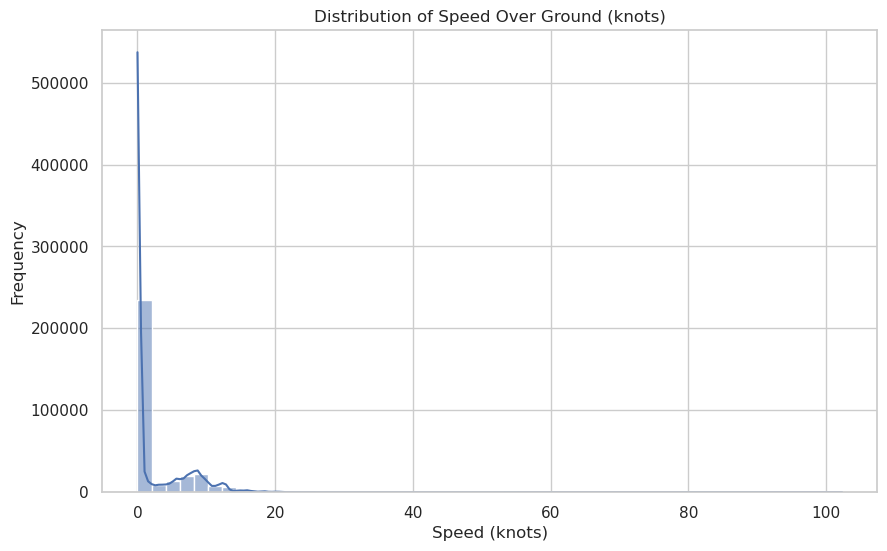

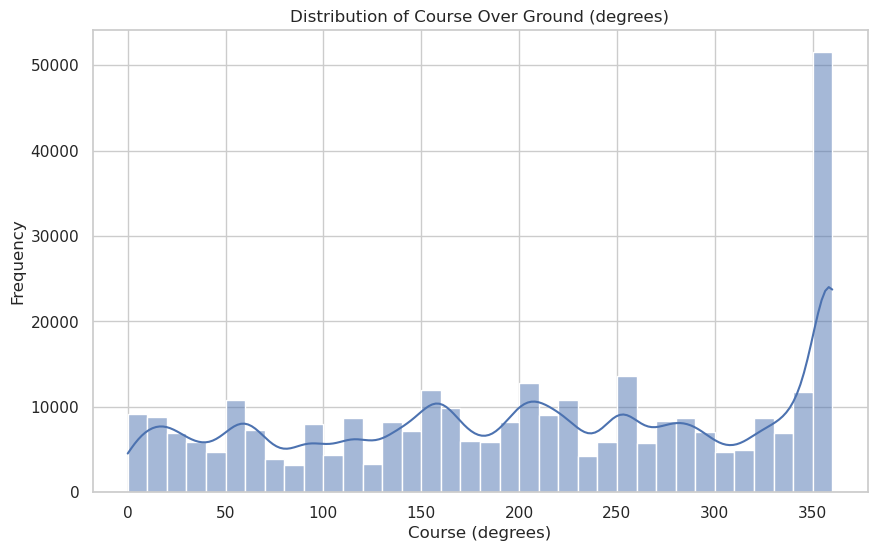

In [12]:
# Histogram of speed over ground (sog)
plt.figure(figsize=(10, 6))
sns.histplot(df["sog"].dropna(), bins=50, kde=True)
plt.title("Distribution of Speed Over Ground (knots)")
plt.xlabel("Speed (knots)")
plt.ylabel("Frequency")
plt.show()

# Histogram of course over ground (cog)
plt.figure(figsize=(10, 6))
sns.histplot(df["cog"].dropna(), bins=36, kde=True)
plt.title("Distribution of Course Over Ground (degrees)")
plt.xlabel("Course (degrees)")
plt.ylabel("Frequency")
plt.show()

In [23]:
# Filter out rows with missing or invalid lat/lon
valid_positions = df.dropna(subset=["lat", "lon"]).copy()

# Sample the data to make the map manageable (e.g., 1000 points)
sample_size = 1000
if len(valid_positions) > sample_size:
    sampled_positions = valid_positions.sample(n=sample_size, random_state=42)  # random_state for reproducibility
else:
    sampled_positions = valid_positions

# Check if there are any valid positions to plot
if not sampled_positions.empty:
    # Calculate the center of the map (mean lat/lon of sampled data)
    center_lat = sampled_positions["lat"].mean()
    center_lon = sampled_positions["lon"].mean()

    # Create a Folium map centered on the mean position
    ais_map = folium.Map(location=[center_lat, center_lon], zoom_start=10)

    # Add a heatmap layer for density visualization
    heat_data = [[row["lat"], row["lon"]] for _, row in sampled_positions.iterrows()]
    folium.plugins.HeatMap(heat_data, radius=15).add_to(ais_map)

    # Optionally add a few random markers for detail (e.g., 10 points)
    for _, row in sampled_positions.sample(n=min(10, len(sampled_positions)), random_state=42).iterrows():
        popup_text = f"MMSI: {row['mmsi']}<br>Vessel: {row['vessel_name']}<br>Speed: {row['sog']} knots<br>Status: {row['nas']}"
        folium.Marker(
            location=[row["lat"], row["lon"]],
            popup=popup_text,
            tooltip=row["vessel_name"]
        ).add_to(ais_map)

    # Display the map
    display(ais_map)
else:
    print("No valid lat/lon data to plot after sampling.")